Intro to QC!

In [3]:
# Install Qiskit and other libs
!pip install qiskit[visualization]
!pip install matplotlib pylatexenc
!pip install qiskit-aer

Single Qubit Circuit

Initial State (before any gates):


<IPython.core.display.Latex object>


Circuit with Hadamard Gate:


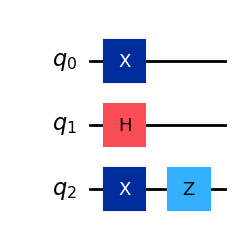


Final State (after Hadamard Gate):


<IPython.core.display.Latex object>


Visualization on the Q-Sphere:


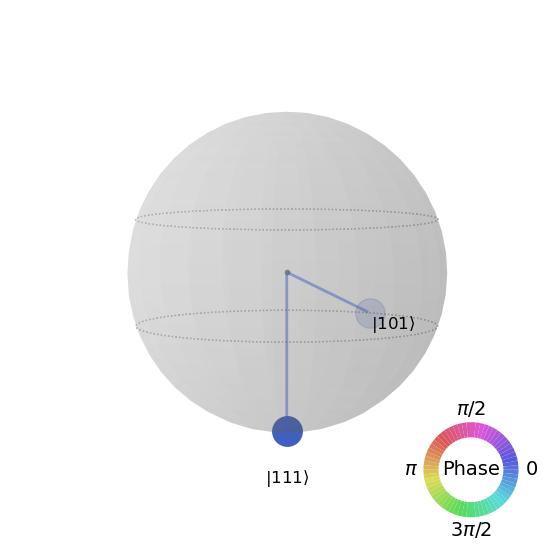

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from IPython.display import display





# 1. Initialize a Quantum Circuit with 1 qubit
qc_single = QuantumCircuit(3)

print("Initial State (before any gates):")
initial_state = Statevector.from_instruction(qc_single)
display(initial_state.draw('latex'))

# 2. Build Your Circuit!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
qc_single.h(1) # Apply Hadamard to qubit 0
qc_single.x(2) # Apply X gate to qubit 0
qc_single.z(2) # Apply Z gate to qubit 0
qc_single.x(0) # Apply X gate to qubit 0


# 3. Visualize the circuit
print("\nCircuit with Hadamard Gate:")
display(qc_single.draw('mpl'))

# 4. Get the final quantum state (Statevector) of the circuit
final_state = Statevector.from_instruction(qc_single)

# 5. Print the state in Dirac notation (Bra-ket)
print("\nFinal State (after Hadamard Gate):")
display(final_state.draw('latex'))

# 6. Visualize the final state on a Q-Sphere
print("\nVisualization on the Q-Sphere:")
final_state.draw('qsphere')








=== Single Qubit Measurement Experiment ===

Circuit for Single Qubit Measurement:


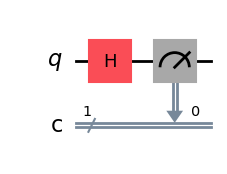


Running simulation with 1024 shots...

Raw Measurement Outcomes (Counts): {'0': 508, '1': 516}

Measurement Results (Distribution Histogram):

Interpretation: Since the qubit was in superposition after the Hadamard gate,
you should see roughly equal probabilities (around 50%) for measuring 0 and 1.
Each run of this cell will yield slightly different, but statistically similar, results due to the probabilistic nature of quantum measurement.


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt

# ==========================================
# Implementation of Single Qubit Measurement
# ==========================================

print("=== Single Qubit Measurement Experiment ===")

# 1. Initialize a Quantum Circuit with 1 quantum bit (qubit) and 1 classical bit
# The classical bit is needed to store the measurement outcome.
qc_measure_single = QuantumCircuit(1, 1)

# 2. Apply a Hadamard gate to put the qubit into superposition
# After this, the qubit is in an equal superposition of |0> and |1>.
qc_measure_single.h(0)

# 3. Add a measurement operation
# Measure qubit 0 and store the result in classical bit 0.
qc_measure_single.measure(0, 0)

# 4. Visualize the circuit with the Hadamard gate and measurement
print("\nCircuit for Single Qubit Measurement:")
display(qc_measure_single.draw('mpl'))

# 5. Run the simulation to get measurement counts
# We'll simulate the circuit 1024 times (shots) to see the distribution of results.
print("\nRunning simulation with 1024 shots...")
simulator = AerSimulator()
compiled_circuit = transpile(qc_measure_single, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc_measure_single)

# 6. Print the raw counts
print("\nRaw Measurement Outcomes (Counts):", counts)

# 7. Plot the histogram of results
# This visualizes how many times each outcome (0 or 1) was measured.
print("\nMeasurement Results (Distribution Histogram):")
fig = plot_histogram(counts)
plt.show(fig)

print("\nInterpretation: Since the qubit was in superposition after the Hadamard gate,")
print("you should see roughly equal probabilities (around 50%) for measuring 0 and 1.")
print("Each run of this cell will yield slightly different, but statistically similar, results due to the probabilistic nature of quantum measurement.")

Entanglement illustration

The current quantum state is:


<IPython.core.display.Latex object>


Visualization on the Q-Sphere:


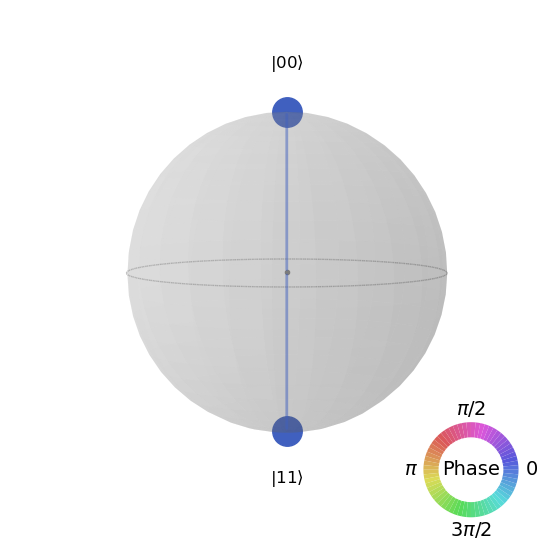

In [6]:
from qiskit.quantum_info import Statevector
from IPython.display import display
from qiskit import QuantumCircuit

# Prepare for the entanglement
qc_illu = QuantumCircuit(2)

# Hardmard gate
qc_illu.h(0)

# CNOT gate
qc_illu.cx(0, 1)


# Get the current quantum state (Statevector) of the circuit
state = Statevector.from_instruction(qc_illu)

# Print the state in Dirac notation (Bra-ket)
print("The current quantum state is:")
display(state.draw('latex'))

# Visualize: View the Phase and Amplitude on a Q-Sphere
print("\nVisualization on the Q-Sphere:")
state.draw('qsphere')

Try to see the statistics distribution!

Circuit with measurement:

Running the experiment 1024 times...
Experiment Results (Distribution):


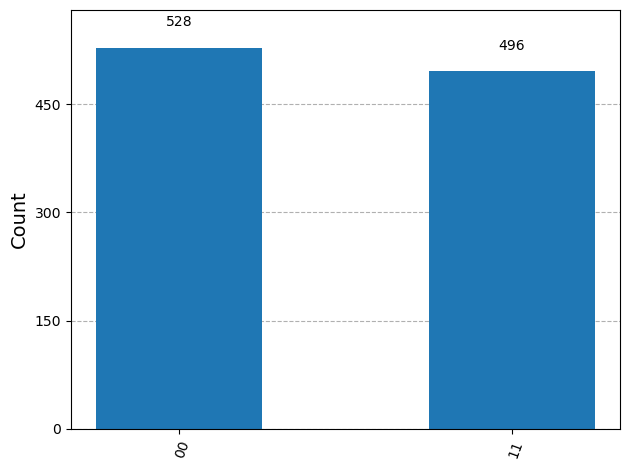

In [7]:
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit_aer import AerSimulator

# 1. Add measurement dials to all qubits
# This adds a barrier and maps quantum results to classical bits
qc_illu.measure_all()

# 2. Visualize the circuit again to see the measurement symbols
print("Circuit with measurement:")
qc_illu.draw('mpl')

# 3. Run the simulation experiment (e.g., flipping the coin 1024 times)
print("\nRunning the experiment 1024 times...")

simulator = AerSimulator()
compiled_circuit = transpile(qc_illu, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# 4. Plot the histogram of results
print("Experiment Results (Distribution):")
plot_histogram(counts)

Collapse caused by measurements

Try to run multiple times and observe the results!


In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from IPython.display import display
from qiskit_aer import AerSimulator

# ==========================================
# Experiment: Verifying Collapse from Partial Measurement
# ==========================================

print("=== Step 1: Create Entanglement (Alice & Bob) ===")
# 1. Initialize a 2-Qubit circuit
qc = QuantumCircuit(2)

# 2. Create the Bell State |Φ+> = (|00> + |11>) / √2
qc.h(0)      # Alice enters superposition
qc.cx(0, 1)  # Alice and Bob become entangled

# 3. [God Mode] Peek at the state BEFORE measurement
print("State BEFORE Measurement (Entangled):")
state_before = Statevector.from_instruction(qc)
display(state_before.draw('latex'))
print("Interpretation: Both Alice and Bob are undefined. They exist as a unified whole.\n")

print("-" * 30)

print("=== Step 2: Measure ONLY Alice (Qubit 0) ===")
# 4. Perform measurement on Qubit 0 (Alice) only
# Note: Adding a measurement instruction triggers a physical collapse

# Create a new circuit for measurement to avoid modifying the original 'qc' for Statevector.from_instruction
qc_measure = qc.copy()
qc_measure.measure_all()

# Use AerSimulator to run the circuit and get the measurement outcome
simulator = AerSimulator()
compiled_circuit = transpile(qc_measure, simulator)
job = simulator.run(compiled_circuit, shots=1)
result = job.result()
counts = result.get_counts()

# Get the single measurement outcome (e.g., '00' or '11')
outcome = list(counts.keys())[0]

# Construct a Statevector representing the collapsed state based on the outcome
state_after = Statevector.from_label(outcome)

print("State AFTER Measurement (Collapsed, one possible outcome):")
display(state_after.draw('latex'))

# ==========================================
# Logic Verification: Analyzing the Outcome
# ==========================================
print("\n=== The Moment of Truth (Verification) ===")

# Parse the result (Qiskit order is q1 q0)
bob_state = outcome[0]   # High bit is Bob (q1)
alice_state = outcome[1] # Low bit is Alice (q0)

print(f"Alice (Q0) Measured Result: {alice_state}")
print(f"Bob   (Q1) Current State :  {bob_state}")

if alice_state == bob_state:
    print("\n✅ VERIFIED!")
    print("We only measured Alice, but Bob's state was instantly 'locked' to match Alice.")
    print("The superposition is gone. The system has collapsed into a single reality.")
else:
    print("\n❌ ERROR (This should theoretically never happen if entangled)")

=== Step 1: Create Entanglement (Alice & Bob) ===
State BEFORE Measurement (Entangled):


<IPython.core.display.Latex object>

Interpretation: Both Alice and Bob are undefined. They exist as a unified whole.

------------------------------
=== Step 2: Measure ONLY Alice (Qubit 0) ===
State AFTER Measurement (Collapsed, one possible outcome):


<IPython.core.display.Latex object>


=== The Moment of Truth (Verification) ===
Alice (Q0) Measured Result: 1
Bob   (Q1) Current State :  1

✅ VERIFIED!
We only measured Alice, but Bob's state was instantly 'locked' to match Alice.
The superposition is gone. The system has collapsed into a single reality.


Quantum Circuit

Reference of basic gates and components : https://quantum.cloud.ibm.com/learning/en/courses/utility-scale-quantum-computing/bits-gates-and-circuits

Basic Q-gates we will be using:

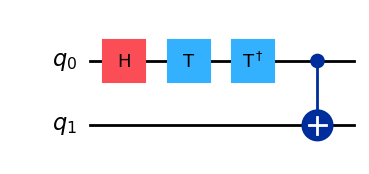

In [9]:
from qiskit import QuantumCircuit

# Create a circuit with two qubits
qc = QuantumCircuit(2)

# add gates
# Hardmard gate
qc.h(0)

# T gate: Rotates phase by 45 degrees
qc.t(0)

# T-Dagger: Rotates phase BACK by 45 degrees
qc.tdg(0)

# CNOT gate
qc.cx(0, 1)

# draw it out!
# 'mpl' generates nice pics
qc.draw('mpl')


          QISKIT BASIC GATES CHEATSHEET


1. PAULI GATES (Bit & Phase Flips)
------------------------------------------------
X Gate (NOT)
   Function: Bit flip (|0> -> |1>)
   Syntax:   `qc.x(0)`

Y Gate
   Function: Bit and Phase flip
   Syntax:   `qc.y(0)`

Z Gate
   Function: Phase flip (rotates phase by pi)
   Syntax:   `qc.z(0)`


2. SUPERPOSITION
------------------------------------------------
H Gate (Hadamard)
   Function: Creates Superposition (|0> -> |+>)
   Syntax:   `qc.h(0)`


3. PHASE & ROTATION GATES
------------------------------------------------
S Gate
   Function: 90-degree phase rotation (sqrt(Z))
   Syntax:   `qc.s(0)`

S-dagger (Sdg)
   Function: -90-degree phase rotation
   Syntax:   `qc.sdg(0)`

T Gate
   Function: 45-degree phase rotation (sqrt(S))
   Syntax:   `qc.t(0)`

T-dagger (Tdg)
   Function: -45-degree phase rotation
   Syntax:   `qc.tdg(0)`

Rotation Gates (Rx, Ry, Rz)
   Function: Rotate by angle 'theta' around axis
   Syntax:   `qc.rx(theta, 0)`
             `qc.ry(theta, 0)`
             `qc.rz(theta, 0)`






4. TWO-QUBIT GATES (Entanglement)
------------------------------------------------
CX / CNOT (Controlled-NOT)
   Function: Flips target if control is |1>
   Syntax:   `qc.cx(control_qubit, target_qubit)`

CZ (Controlled-Z)
   Function: Adds phase if both are |1>
   Syntax:   `qc.cz(control_qubit, target_qubit)`

SWAP
   Function: Swaps states of two qubits
   Syntax:   `qc.swap(qubit1, qubit2)`


5. THREE-QUBIT GATES
------------------------------------------------
CCX (Toffoli)
   Function: AND gate logic (Controlled-Controlled-NOT)
   Syntax:   `qc.ccx(control1, control2, target)`

CSWAP (Fredkin)
   Function: Controlled Swap
   Syntax:   `qc.cswap(control, target1, target2)`


6. MEASUREMENT
------------------------------------------------
Measure
   Function: Read quantum state into classical bit
   Syntax:   `qc.measure(qubit_index, classical_bit_index)`
   

Some circuit examples & Circuit Identity

Example 1: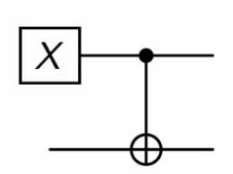

Input (q1 q0)   | Output (q1 q0) 
-----------------------------------
     |00>        |      |11>
     |01>        |      |10>
     |10>        |      |01>
     |11>        |      |00>

Diagram of the circuit (for input '00'):


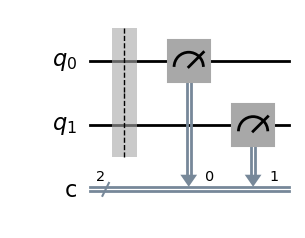

In [10]:
def run_qc1(input_state_str):
    """
    Takes an input string (e.g., '01'), initializes the circuit,
    runs your gates, and returns the output string.
    """
    qc1 = QuantumCircuit(2, 2)  # Initialize with 2 qubits and 2 classical bits

    # 1. Initialize Input
    # Qiskit reads strings right-to-left (q1 is index 0 of string if using 'q1q0')
    # But to make it intuitive: Input '10' means q1=1, q0=0.
    if input_state_str[1] == '0': # q0 is the rightmost digit
        qc1.x(0)
    if input_state_str[0] == '0': # q1 is the leftmost digit
        qc1.x(1)

    # 2. Apply YOUR Gates
    qc1.barrier() # Visual separator
    # Write these gates using Qiskit!
    # start with qc1.


    # 3. Calculate Output
    qc1.measure(0,0)
    qc1.measure(1,1)

    # Use AerSimulator to run the circuit and get the measurement outcome
    simulator = AerSimulator()
    compiled_circuit = transpile(qc1, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts()
    output_bitstring = list(counts.keys())[0]

    return qc1, output_bitstring

# --- Run for All Inputs ---
inputs = ['00', '01', '10', '11']

print(f"{'Input (q1 q0)':<15} | {'Output (q1 q0)':<15}")
print("-" * 35)

for inp in inputs:
    circuit, out = run_qc1(inp)
    print(f"     |{inp}>        |      |{out}>")

# --- Visualize the Last Circuit ---
print("\nDiagram of the circuit (for input '00'):")
display(circuit.draw('mpl'))

Example 2: 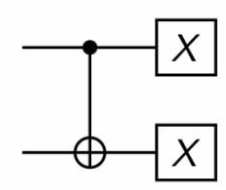

Input (q1 q0)   | Output (q1 q0) 
-----------------------------------
     |00>        |      |11>
     |01>        |      |10>
     |10>        |      |01>
     |11>        |      |00>

Diagram of the circuit (for input '00'):


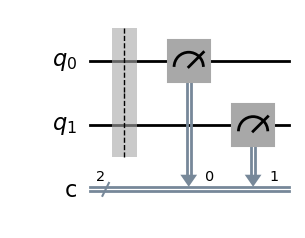

In [11]:
def run_qc2(input_state_str):
    """
    Takes an input string (e.g., '01'), initializes the circuit,
    runs your gates, and returns the output string.
    """
    qc2 = QuantumCircuit(2, 2)  # Initialize with 2 qubits and 2 classical bits

    # 1. Initialize Input
    # Qiskit reads strings right-to-left (q1 is index 0 of string if using 'q1q0')
    # But to make it intuitive: Input '10' means q1=1, q0=0.
    if input_state_str[1] == '0': # q0 is the rightmost digit
        qc2.x(0)
    if input_state_str[0] == '0': # q1 is the leftmost digit
        qc2.x(1)

    # 2. Apply YOUR Gates
    qc2.barrier() # Visual separator
    # Write these gates using Qiskit!
    # Start with qc2.


    # 3. Calculate Output
    qc2.measure(0,0)
    qc2.measure(1,1)

    # Use AerSimulator to run the circuit and get the measurement outcome
    simulator = AerSimulator()
    compiled_circuit = transpile(qc2, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts()
    output_bitstring = list(counts.keys())[0]

    return qc2, output_bitstring

# --- Run for All Inputs ---
inputs = ['00', '01', '10', '11']

print(f"{'Input (q1 q0)':<15} | {'Output (q1 q0)':<15}")
print("-" * 35)

for inp in inputs:
    circuit, out = run_qc2(inp)
    print(f"     |{inp}>        |      |{out}>")

# --- Visualize the Last Circuit ---
print("\nDiagram of the circuit (for input '00'):")
display(circuit.draw('mpl'))

Actually, this important property on equivalence of these circuits is called circuit identity.
Here are some basic identity circuits:
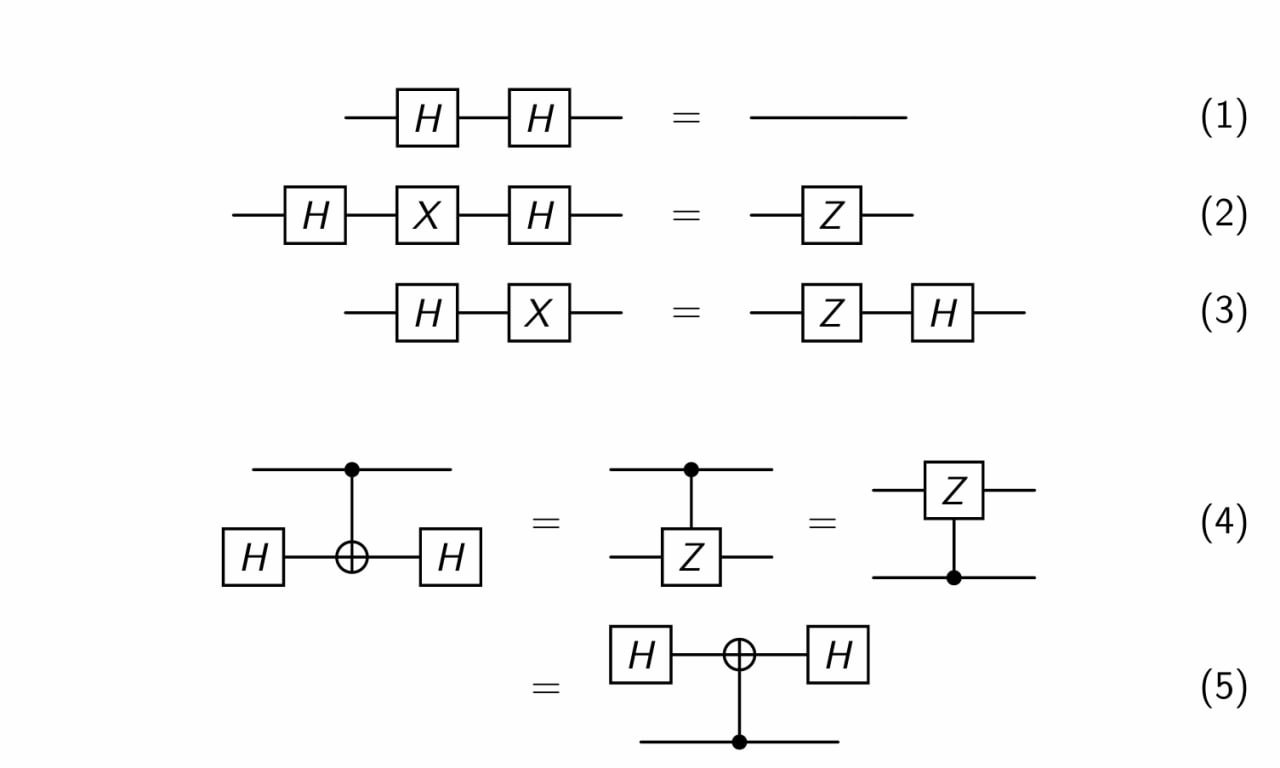
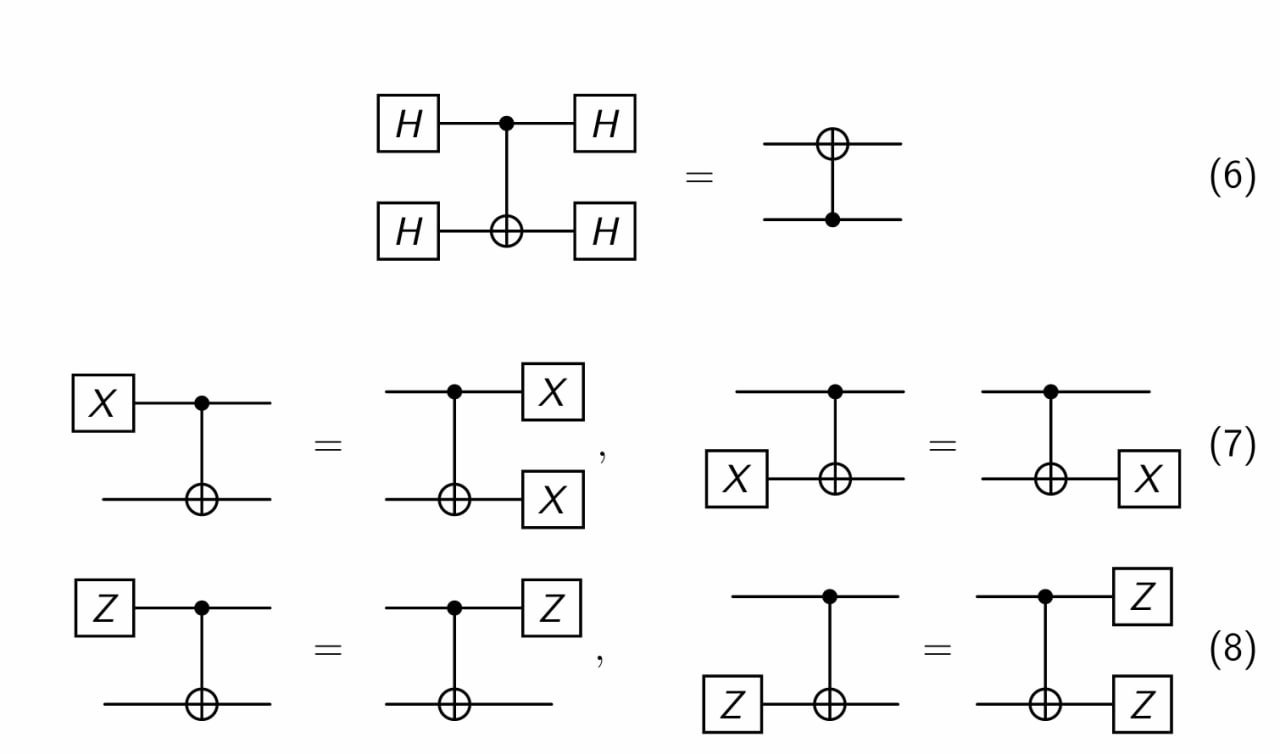

Toffoli gate: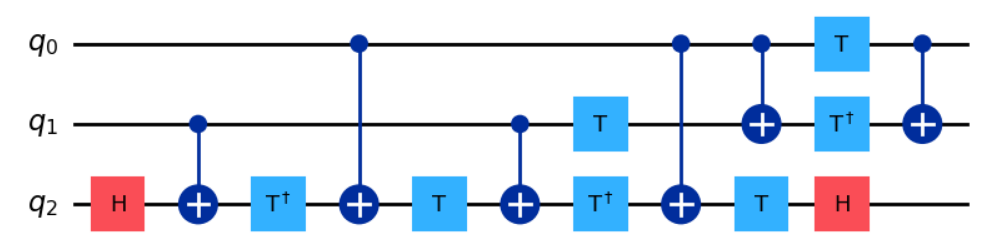

Let's try to create this gate using Quiskit! Fill in the blank and see if the output matches with the schematic above!

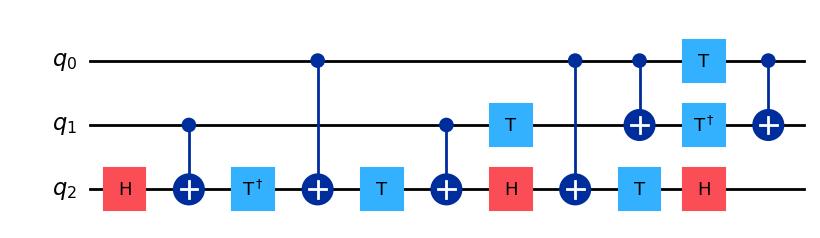

Input was |110>. After the circuit, the output state is:


<IPython.core.display.Latex object>

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from IPython.display import display

# build up a Toffoli gate using basic q-gates

# 1. Initialize a 3-Qubit circuit
qc_toffoli = QuantumCircuit(3)

#(optional)Your task here: modify the initial state by apply x gate!
# e.g. qc_toffoli.x(0)


# Modify the input settings to see what happens!

# --- The Decomposition Circuit (H, T, CNOT) ---
# This sequence mathematically reconstructs the Toffoli logic

qc_toffoli.h(2) # What gate are we using here? Fill in the blank
qc_toffoli.cx(1, 2)
qc_toffoli.tdg(2)
qc_toffoli.cx(0, 2) # Fill in the parameters according to our cheatsheet!
qc_toffoli.t(2)
qc_toffoli.cx(1, 2)
qc_toffoli.h(2) # What gate are we using here? Fill in the blank
qc_toffoli.cx(0, 2)
qc_toffoli.t(1)
qc_toffoli.t(2)
qc_toffoli.h(2)
qc_toffoli.cx(0,1) # Fill in the parameters according to our cheatsheet!
qc_toffoli.t(0)
qc_toffoli.tdg(1)
qc_toffoli.cx(0,1) # Fill in the parameters according to our cheatsheet!

display(qc_toffoli.draw('mpl'))
# ---------------------------------------------

# Check the final state
# We expect |111> if the logic works (Input 110 -> Output 111)
state_t = Statevector.from_instruction(qc_toffoli)



print("Input was |110>. After the circuit, the output state is:")
display(state_t.draw('latex'))

Generation of an arbitary 2-qubit state

1. Define the target state

In [17]:
import numpy as np
from scipy.linalg import svd
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

from qiskit.synthesis import OneQubitEulerDecomposer
from IPython.display import display


# 1. Define Target State (Normalized)
target_coeffs = np.array([0.5, 0.4, 0.4j, -np.sqrt(1 - 0.5**2 - 0.4**2 - 0.4**2)])
target_coeffs = target_coeffs / np.linalg.norm(target_coeffs)

target_state = Statevector(target_coeffs)
display(target_state.draw('latex'))

<IPython.core.display.Latex object>

2. SVD decomposition

In [18]:
from scipy.linalg import svd
from qiskit import QuantumCircuit
from qiskit.synthesis import OneQubitEulerDecomposer


# 2. Perform SVD
# Reshape: Row=Q1 (High), Col=Q0 (Low)
M = target_coeffs.reshape(2, 2)
U_mat, s, Vh_mat = svd(M)

# 3. Calculate Entanglement Angle
theta_entanglement = 2 * np.arccos(s[0])
print(f"Calculated Entanglement Theta: {theta_entanglement:.4f}")

# --- FIX 2: Helper function to extract angles from the Circuit object ---
def get_euler_angles(unitary_matrix):
    # Initialize decomposer for U3 basis
    decomposer = OneQubitEulerDecomposer(basis='U3')
    # This returns a QuantumCircuit
    qc = decomposer(unitary_matrix)

    # Handle case where matrix is Identity (circuit is empty)
    if len(qc.data) == 0:
        return [0.0, 0.0, 0.0]

    # Extract [theta, phi, lam] from the first instruction (U3 gate)
    return qc.data[0].operation.params

# Extract parameters
# U acts on Q1 (Rows)
u_q1_params = get_euler_angles(U_mat)

# V acts on Q0 (Cols) -> Remember to transpose Vh!
u_q0_params = get_euler_angles(Vh_mat.T)


print(" -> Parameters for Qubit 1 (U):", np.round(u_q1_params, 3))
print(" -> Parameters for Qubit 0 (V):", np.round(u_q0_params, 3))





Calculated Entanglement Theta: 0.8178
 -> Parameters for Qubit 1 (U): [ 1.837  2.49  -2.013]
 -> Parameters for Qubit 0 (V): [ 1.837  0.919 -3.142]


3. Build and Verify

In [ ]:
# Build & Verify

qc = QuantumCircuit(2)

# Step A: Skeleton
qc.ry(theta_entanglement, 0)

# Step B: Entangle
qc.cx(0, 1)

# Step C: Clothes (Apply extracted parameters)
# Note: We must convert numpy arrays to list or simple floats for Qiskit gates
qc.u(*[float(p) for p in u_q1_params], 1)
qc.u(*[float(p) for p in u_q0_params], 0)

# Verify
print("\n⚡️ Constructed Circuit:")
display(qc.draw('mpl'))

created_state = Statevector.from_instruction(qc)
target_state = Statevector(target_coeffs)
fidelity = abs(created_state.inner(target_state))**2

if fidelity > 0.999:
    print(f"\n✅ SUCCESS! Fidelity = {fidelity:.6f}")
else:
    print(f"\n❌ FAIL. Fidelity = {fidelity:.6f}")

Quantum Teleportation:


https://algassert.com/quirk#circuit={%22cols%22:[[1,%22H%22],[1,%22%E2%80%A2%22,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22Measure%22,%22Measure%22],[1,%22%E2%80%A2%22,%22X%22],[%22%E2%80%A2%22,1,%22Z%22],[1,1,%22Bloch%22],[1,1,%22~f7c0%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}

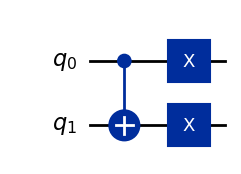

In [19]:
#Answer to examples:
qc1 = QuantumCircuit(2)
qc1.x(0)
qc1.cx(0,1)
qc1.draw('mpl')

qc2 = QuantumCircuit(2)
qc2.cx(0,1)
qc2.x(0)
qc2.x(1)
qc2.draw('mpl')


In [20]:
# Answer to Toffoli gate
qc_toffoli.h(2)
qc_toffoli.cx(1, 2)
qc_toffoli.tdg(2)
qc_toffoli.cx(0, 2)
qc_toffoli.t(2)
qc_toffoli.cx(1, 2)
qc_toffoli.tdg(2)
qc_toffoli.cx(0, 2)
qc_toffoli.t(1)
qc_toffoli.t(2)
qc_toffoli.h(2)
qc_toffoli.cx(0, 1)
qc_toffoli.t(0)
qc_toffoli.tdg(1)
qc_toffoli.cx(0, 1)
